In [17]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [18]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/Eraintrim/pr_197901-201812.nc')
 

data

<xarray.Dataset>
Dimensions:    (time: 480, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T06:00:00 ... 2018-12-01T06:00:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [19]:
#data.variables

In [20]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 1981-02-01T06:00:00 ... 2015-12-01T06:00:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-02-01 ... 2015-12-01T12:00:00
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [21]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T06:00:00 ... 2015-09-01T06:00:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 ... 2015-09-01T12:00:00
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [22]:
new_lat=np.arange(0,49,0.75)
jjas_data=jjas_data.interp(latitude=new_lat)
jjas_data


<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, longitude: 480, latitude: 66)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T06:00:00 ... 2015-09-01T06:00:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float64 0.0 0.75 1.5 2.25 ... 46.5 47.25 48.0 48.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 ... 2015-09-01T12:00:00
    tp         (time, latitude, longitude) float64 1.269e-05 ... 7.145e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [23]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(longitude=slice(86,94),latitude=slice(18,27))
jjas_data





<xarray.Dataset>
Dimensions:    (time: 140, bnds: 2, longitude: 11, latitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01T06:00:00 ... 2015-09-01T06:00:00
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 ... 2015-09-01T12:00:00
    tp         (time, latitude, longitude) float64 0.0001947 ... 0.00035
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [24]:
#getting the mean for JJAS data
jjas_mean = jjas_data.tp.mean('time')
 
jjas_mean 

<xarray.DataArray 'tp' (latitude: 13, longitude: 11)>
array([[0.00043766, 0.00047265, 0.00050153, 0.00050972, 0.00053704,
        0.00054074, 0.00056574, 0.00057368, 0.00060696, 0.00064911,
        0.00070254],
       [0.00040376, 0.00046241, 0.00050501, 0.00051031, 0.00053978,
        0.0005359 , 0.00056803, 0.00057714, 0.00063882, 0.00068877,
        0.00071624],
       [0.00037245, 0.00044442, 0.00048178, 0.00050018, 0.00052543,
        0.00054373, 0.00057789, 0.00060797, 0.00068538, 0.00071323,
        0.00072134],
       [0.0003682 , 0.00039579, 0.00045296, 0.00050475, 0.00052192,
        0.00055819, 0.00058911, 0.0006533 , 0.00070703, 0.00074131,
        0.00069622],
       [0.00040063, 0.00035076, 0.00042687, 0.00048703, 0.00051549,
        0.00056401, 0.0006083 , 0.00067998, 0.00067018, 0.00072912,
        0.00060301],
       [0.00038798, 0.00036043, 0.00043873, 0.00049864, 0.00052387,
        0.00055256, 0.00059791, 0.00064314, 0.00060154, 0.00061955,
        0.00048054],
       [0.00037397, 0.0003938 , 0.000446  , 0.00048068, 0.00049473,
        0.00051297, 0.00055638, 0.0005706 , 0.00052751, 0.00051374,
        0.00039807],
       [0.0003566 , 0.00038923, 0.00040871, 0.00042114, 0.00043783,
        0.00045898, 0.00049758, 0.00050411, 0.00046936, 0.00046273,
        0.00042478],
       [0.00036639, 0.00039445, 0.00040304, 0.00040533, 0.00042176,
        0.00045263, 0.00048173, 0.0004881 , 0.00046659, 0.00045155,
        0.00045213],
       [0.00038097, 0.0004103 , 0.0004292 , 0.00044576, 0.00047448,
        0.00050596, 0.0005642 , 0.00058757, 0.00050504, 0.00045558,
        0.00047731],
       [0.00036808, 0.00040765, 0.00044826, 0.00047824, 0.00051696,
        0.00053365, 0.00056217, 0.00061925, 0.0005467 , 0.00046832,
        0.00047045],
       [0.00032927, 0.00035003, 0.00038566, 0.00042351, 0.00052685,
        0.00059472, 0.00052527, 0.00052903, 0.00053681, 0.00053377,
        0.00054601],
       [0.00035919, 0.00045096, 0.00051903, 0.00058112, 0.0005817 ,
        0.00055337, 0.00058942, 0.00058611, 0.00062847, 0.00069339,
        0.00052593]])
Coordinates:
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0

In [25]:
#the data is in m so we multiply by 1000 to convert to mm/day

pr_mm = (jjas_mean*1000*24)
pr_mm

<xarray.DataArray 'tp' (latitude: 13, longitude: 11)>
array([[10.50387242, 11.34369646, 12.03662596, 12.23318079, 12.88886283,
        12.97775629, 13.57766699, 13.76827223, 14.56702752, 15.5786689 ,
        16.86107965],
       [ 9.69032165, 11.09773379, 12.12032527, 12.24748268, 12.95468688,
        12.8616321 , 13.63268836, 13.85128433, 15.33171682, 16.5305136 ,
        17.18966161],
       [ 8.93880438, 10.66601914, 11.56266648, 12.00438839, 12.61030896,
        13.04949367, 13.86930384, 14.59119702, 16.44906952, 17.11752407,
        17.31205523],
       [ 8.83676216,  9.49886453, 10.87100345, 12.11408095, 12.52597275,
        13.39658222, 14.13862785, 15.67918855, 16.96883273, 17.79145331,
        16.70924579],
       [ 9.61501746,  8.41814499, 10.24477647, 11.68875541, 12.37176099,
        13.5361381 , 14.59912414, 16.31946638, 16.08435181, 17.4988226 ,
        14.47232919],
       [ 9.31160411,  8.65036898, 10.52943156, 11.96739555, 12.57298878,
        13.26149965, 14.34974162, 15.43534937, 14.43686684, 14.86912994,
        11.5328839 ],
       [ 8.97537622,  9.45127147, 10.70405636, 11.53637787, 11.87355103,
        12.31136419, 13.35303739, 13.69446914, 12.66013437, 12.32967348,
         9.55366496],
       [ 8.55836358,  9.34163416,  9.80909118, 10.1072933 , 10.50794018,
        11.01563422, 11.94203828, 12.09862195, 11.26473627, 11.10553464,
        10.1947637 ],
       [ 8.79332123,  9.46681408,  9.67299962,  9.72785579, 10.12213548,
        10.8630786 , 11.56159511, 11.71449451, 11.19815014, 10.83708924,
        10.85110403],
       [ 9.14329644,  9.84723114, 10.30074392, 10.69835828, 11.38746039,
        12.1430678 , 13.54079206, 14.10172538, 12.12095628, 10.93401413,
        11.45553107],
       [ 8.8339488 ,  9.78348811, 10.75825696, 11.47766365, 12.40706013,
        12.80756262, 13.49203046, 14.86206475, 13.1206923 , 11.23970065,
        11.29091324],
       [ 7.90245725,  8.40079228,  9.25582115, 10.16433699, 12.64450843,
        14.27325936, 12.60649862, 12.69680124, 12.88335018, 12.81041981,
        13.10423858],
       [ 8.62049075, 10.82312469, 12.45660015, 13.9469922 , 13.96084909,
        13.28093643, 14.14605168, 14.06667197, 15.08319652, 16.64127394,
        12.62227693]])
Coordinates:
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0

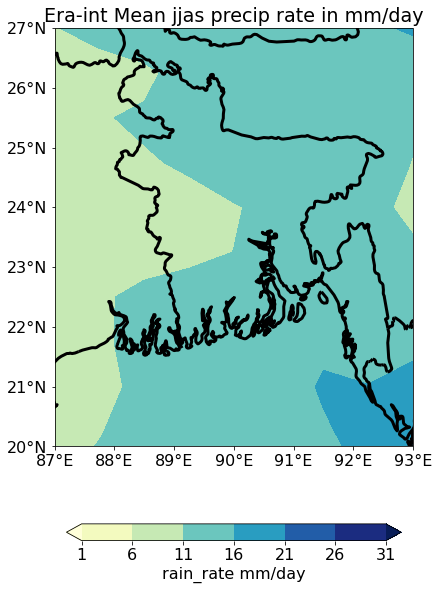

In [32]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['longitude'][:], pr_mm['latitude'][:],pr_mm,
                levels=np.arange(1,35+1,5), transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 
plt.title('Era-int Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_reana-era-int_jjas_mean.png")






In [27]:
#interpolating into new latitude
new_lat=np.arange(0,49,0.75)
data=data.interp(latitude=new_lat)
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, longitude: 480, latitude: 66)
Coordinates:
  * time       (time) datetime64[ns] 1981-02-01T06:00:00 ... 2015-12-01T06:00:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float64 0.0 0.75 1.5 2.25 ... 46.5 47.25 48.0 48.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-02-01 ... 2015-12-01T12:00:00
    tp         (time, latitude, longitude) float64 0.0002692 ... 7.696e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [28]:
#to select the x and y coordinates
data = data.sel(longitude=slice(86,94),latitude=slice(18,27))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, longitude: 11, latitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1981-02-01T06:00:00 ... 2015-12-01T06:00:00
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-02-01 ... 2015-12-01T12:00:00
    tp         (time, latitude, longitude) float64 6.871e-06 ... 3.375e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Jul 26 14:21:52 2022: cdo divc,48.0 pr_197901-201812.nc...
    frequency:    day
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [29]:
annual_mean = data.tp.mean('time')
annual_mean

<xarray.DataArray 'tp' (latitude: 13, longitude: 11)>
array([[0.00019182, 0.00020363, 0.00021515, 0.00021892, 0.00023099,
        0.00023384, 0.00024629, 0.00025182, 0.00026732, 0.00028483,
        0.00030281],
       [0.00017669, 0.00019643, 0.00021352, 0.00021635, 0.00022967,
        0.00022885, 0.00024427, 0.00025114, 0.00027841, 0.00029729,
        0.00030723],
       [0.00016404, 0.00018784, 0.00020208, 0.00020929, 0.0002216 ,
        0.00022922, 0.00024589, 0.00026108, 0.00029511, 0.00030336,
        0.00030556],
       [0.00016369, 0.00017033, 0.00019081, 0.0002098 , 0.00021893,
        0.00023349, 0.00024894, 0.00027695, 0.00030119, 0.00031137,
        0.0002974 ],
       [0.00017778, 0.00015406, 0.00018038, 0.00020408, 0.00021612,
        0.00023686, 0.00025595, 0.00028742, 0.00028882, 0.00030773,
        0.00026347],
       [0.00016885, 0.00016147, 0.00018865, 0.0002174 , 0.00022787,
        0.00024256, 0.00025512, 0.00027608, 0.00026868, 0.00026653,
        0.00022314],
       [0.00015656, 0.00017159, 0.00019471, 0.00021648, 0.00022488,
        0.00023631, 0.00025056, 0.00026139, 0.00024334, 0.00022967,
        0.00019357],
       [0.00014829, 0.00016551, 0.00017854, 0.00019094, 0.00020354,
        0.00021856, 0.00024068, 0.00025249, 0.00022999, 0.00022006,
        0.00021482],
       [0.00015258, 0.00016848, 0.00017817, 0.00018648, 0.00020096,
        0.00022464, 0.00024631, 0.00025768, 0.00024329, 0.0002293 ,
        0.00023837],
       [0.00015743, 0.00017363, 0.0001862 , 0.00020082, 0.00022543,
        0.00025259, 0.00029631, 0.00032406, 0.00029689, 0.00025876,
        0.00025954],
       [0.0001515 , 0.00016964, 0.00019317, 0.00021336, 0.000242  ,
        0.00026594, 0.00030008, 0.00037509, 0.00039729, 0.00032873,
        0.00029442],
       [0.00013514, 0.00014051, 0.00015652, 0.00017169, 0.0002168 ,
        0.00025768, 0.00023834, 0.00025069, 0.00027639, 0.00029137,
        0.00029163],
       [0.00015495, 0.00021697, 0.00028006, 0.0003042 , 0.00028678,
        0.00027864, 0.00031448, 0.00027962, 0.00029923, 0.00035527,
        0.00026952]])
Coordinates:
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0

In [30]:
#converting from m to mm/day

annual_pr_mm = annual_mean*1000*24
annual_pr_mm

<xarray.DataArray 'tp' (latitude: 13, longitude: 11)>
array([[4.60367863, 4.88716575, 5.16371555, 5.25401942, 5.54372092,
        5.61223684, 5.91106391, 6.0437133 , 6.41579426, 6.83580448,
        7.26751091],
       [4.24050893, 4.71433416, 5.12458561, 5.19234845, 5.51212448,
        5.49232724, 5.86257503, 6.02743084, 6.68176463, 7.13485406,
        7.37356701],
       [3.93699133, 4.50820051, 4.84982477, 5.02287542, 5.31836982,
        5.50125151, 5.9013196 , 6.26582923, 7.08270601, 7.28075927,
        7.33339466],
       [3.92862671, 4.08789259, 4.57945571, 5.03528686, 5.25429691,
        5.60368446, 5.97459496, 6.64670315, 7.22866358, 7.47276821,
        7.13758462],
       [4.26680117, 3.69753148, 4.32905587, 4.89793559, 5.18695241,
        5.68453227, 6.14271945, 6.89804159, 6.93160207, 7.38555182,
        6.32326732],
       [4.05239906, 3.8752826 , 4.52755487, 5.21765553, 5.46891089,
        5.82153291, 6.12296498, 6.6260399 , 6.44827518, 6.39665793,
        5.35526962],
       [3.75753052, 4.11812993, 4.67309498, 5.19556862, 5.39701366,
        5.67143636, 6.01340776, 6.2733522 , 5.84018354, 5.51198036,
        4.64564934],
       [3.55891627, 3.97220795, 4.28485276, 4.58253773, 4.88504612,
        5.2453552 , 5.77625241, 6.05971659, 5.51976461, 5.28155951,
        5.15561154],
       [3.66196875, 4.04356261, 4.27598777, 4.47556962, 4.82303291,
        5.39144914, 5.91141998, 6.18437829, 5.83901806, 5.50329626,
        5.72078478],
       [3.77825713, 4.16717055, 4.46869194, 4.81976679, 5.41028523,
        6.06218204, 7.11154066, 7.77752315, 7.12537524, 6.21022908,
        6.22884411],
       [3.63607462, 4.07133177, 4.63600512, 5.12073564, 5.80804135,
        6.38256414, 7.20180073, 9.00206709, 9.53498456, 7.88956641,
        7.06599096],
       [3.24329035, 3.37218645, 3.75657989, 4.1205322 , 5.20308035,
        6.18425968, 5.72026561, 6.01658266, 6.6333089 , 6.99278265,
        6.99908645],
       [3.71886265, 5.207364  , 6.72132321, 7.30075537, 6.88269899,
        6.68728047, 7.54758738, 6.71086714, 7.18148336, 8.52655439,
        6.4684235 ]])
Coordinates:
  * longitude  (longitude) float32 86.25 87.0 87.75 88.5 ... 92.25 93.0 93.75
  * latitude   (latitude) float64 18.0 18.75 19.5 20.25 ... 25.5 26.25 27.0

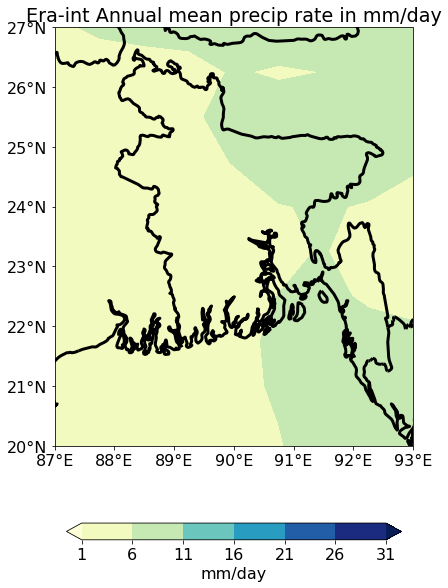

In [31]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['longitude'][:], annual_pr_mm['latitude'][:],annual_pr_mm,
                 levels=np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)


#plt.title('Era-int Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.title('Era-int Annual mean precip rate in mm/day')

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_reana-era-int_annual_mean.png")

